# Breast Cancer Dataset Detection using Support Vector Machine (SVM)

## 1.1 Data Retrieving

In [7]:
from sklearn.datasets import load_breast_cancer

breast_cancer_dataset = load_breast_cancer()

In [4]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
breast_cancer_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## 1.2 Data Exploration

In [8]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
breast_cancer_dataset.data.shape

(569, 30)

In [15]:
breast_cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
breast_cancer_dataset.target.shape

(569,)

## 1.3 Split these feature vectors into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset.data, breast_cancer_dataset.target, test_size = 0.2, random_state = 42)

In [18]:
X_train.shape

(455, 30)

In [19]:
X_test.shape

(114, 30)

In [20]:
y_train.shape

(455,)

In [21]:
y_test.shape

(114,)

## 1.4 Build SVM model 

In [23]:
from sklearn.svm import SVC

model = SVC()

## 1.5 Training the model to make a prediction

In [24]:
model.fit(X_train, y_train)

SVC()

In [25]:
y_pred = model.predict(X_test)

## 1.6 Evaluate the model 

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.9473684210526315
Precision: 0.9514695830485304
Recall: 0.9473684210526315
F1-score: 0.9464615931721194


# 2.0 The Classification Report

In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names = breast_cancer_dataset.target_names)
print(report)

              precision    recall  f1-score   support

   malignant       1.00      0.86      0.93        43
      benign       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## 2.1 Confusion Matric Visualisation with Heatmap

Text(136.97222222222223, 0.5, 'Predicted label')

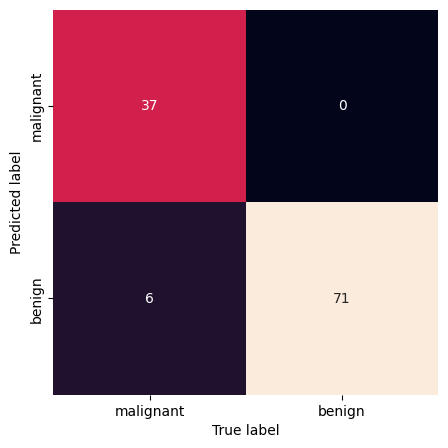

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns

mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=breast_cancer_dataset.target_names,
yticklabels=breast_cancer_dataset.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [36]:
params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [35]:
params = model.get_params()

## 2.2 Parameter Tunning

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
model = SVC()

## 2.3 Parameter Setup

In [45]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [49]:
grs = GridSearchCV(model, param_grid=param_grid)
grs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

## 2.4 Output optimal values

In [50]:
print("Best Hyper Parameters:",grs.best_params_)

Best Hyper Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [51]:
model = grs.best_estimator_
y_pred=model.predict(X_test)

In [55]:
import numpy as np
import pandas as pd

cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,5
is_healthy,3,40


## 2.5 Evaluate Model

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.9298245614035088
Precision: 0.9310111026358167
Recall: 0.9298245614035088
F1-score: 0.9301207564365458


<Axes: >

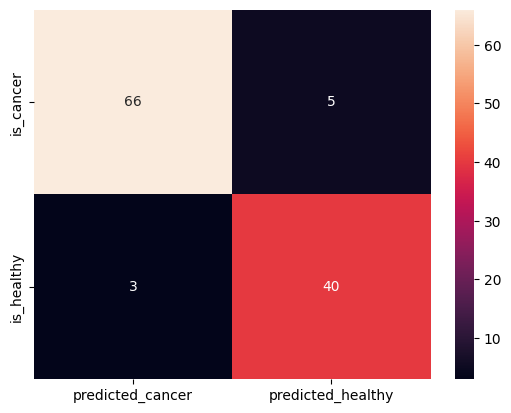

In [59]:
sns.heatmap(confusion, annot=True)

In [61]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

